In [25]:
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter
import numpy as np

In [ ]:
train = pd.read_csv("data/train.csv")
train.head(3)

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...


<Axes: >

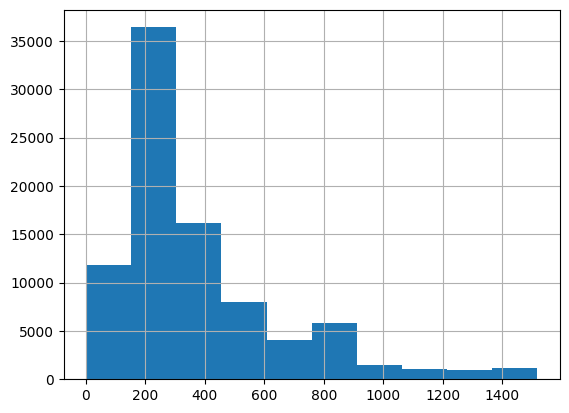

In [21]:
train['crimeaditionalinfo'].str.len().hist()

In [22]:
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()


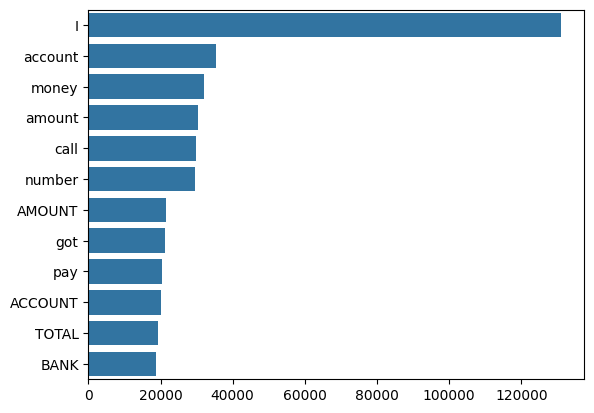

In [23]:
plot_top_non_stopwords_barchart(train['crimeaditionalinfo'])

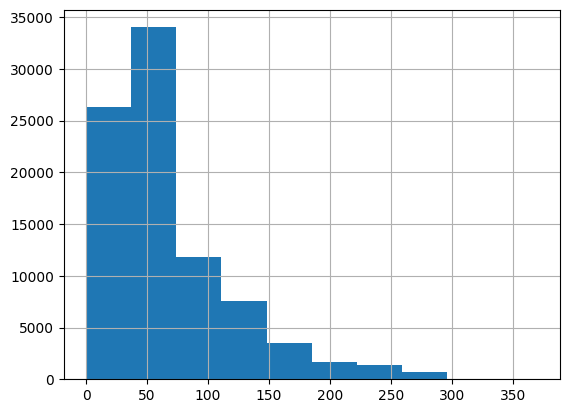

In [24]:
plot_word_number_histogram(train['crimeaditionalinfo'])

<Axes: >

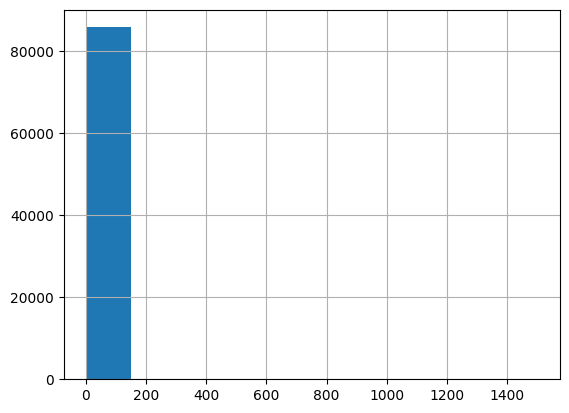

In [28]:
#----Average Word length -----
train['crimeaditionalinfo'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

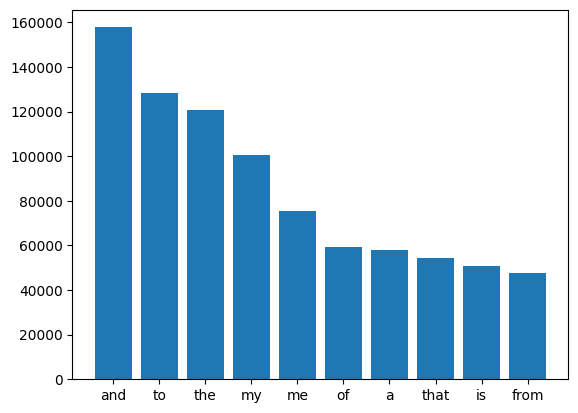

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

plot_top_stopwords_barchart(train['crimeaditionalinfo'])

<Axes: >

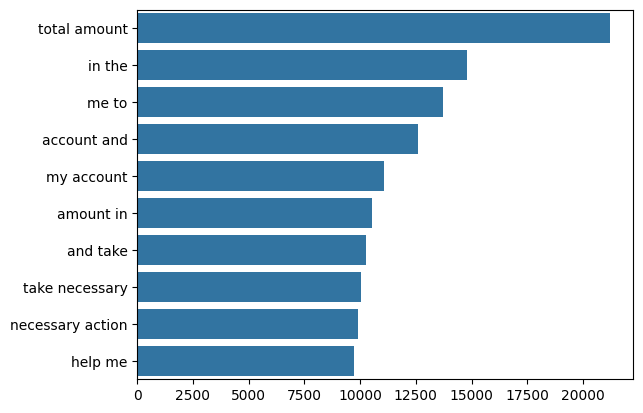

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                    for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

top_n_bigrams=get_top_ngram(train['crimeaditionalinfo'],2)
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

In [49]:
import numpy as np
import nltk
from nltk.corpus import stopwords
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis.gensim


def get_lda_objects(text):
    nltk.download('stopwords')    
    stop=set(stopwords.words('english'))

    
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
    
    return lda_model, bow_corpus, dic

def plot_lda_vis(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
    return vis

In [44]:
lda_model, bow_corpus, dic = get_lda_objects(train['crimeaditionalinfo'])
plot_lda_vis(lda_model, bow_corpus, dic)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/christy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.197151 -0.046957       1        1  59.057553
3      0.097475 -0.265204       2        1  16.863388
1     -0.404883 -0.001340       3        1  13.435137
0      0.110257  0.313501       4        1  10.643922, topic_info=         Term          Freq         Total Category  logprob  loglift
106    AMOUNT  20585.000000  20585.000000  Default  30.0000  30.0000
104   ACCOUNT  19333.000000  19333.000000  Default  29.0000  29.0000
125     TOTAL  18664.000000  18664.000000  Default  28.0000  28.0000
108      BANK  17962.000000  17962.000000  Default  27.0000  27.0000
107       AND  15889.000000  15889.000000  Default  26.0000  26.0000
..        ...           ...           ...      ...      ...      ...
234     Fraud   3976.350162   9712.374819   Topic4  -4.4910   1.3471
161   account   6304.468189  39930.521739   Topic4  -4.0301   0.3943
330      know   2964.564358   7202.407240   Topic4  -4.7847   1.3525
842  password   2250.470163   3244.245661   Topic4  -5.0603   1.8744
39      phone   3307.527841  17993.721161   Topic4  -4.6752   0.5464

[220 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
104       3  0.999938  ACCOUNT
105       3  0.999941   ACTION
106       3  0.999986   AMOUNT
107       3  0.999982      AND
174       1  0.999838    After
...     ...       ...      ...
197       2  0.097179    video
173       1  0.999806     want
576       1  0.999835  website
358       1  0.265617  working
358       4  0.734400  working

[262 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 2, 1])

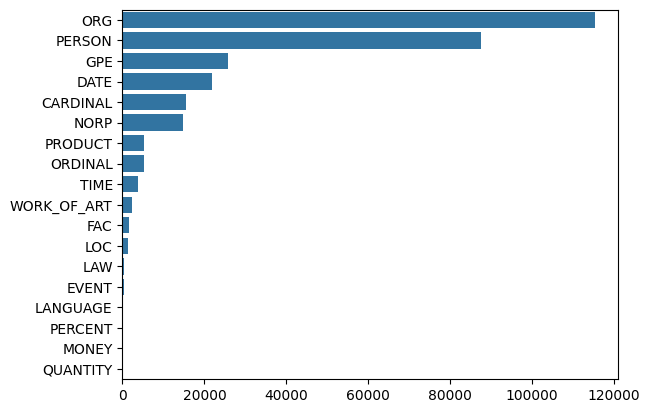

In [47]:

import spacy

def plot_named_entity_barchart(text):
    nlp = spacy.load("en_core_web_sm")
    
    def _get_ner(text):
        doc=nlp(text)
        return [X.label_ for X in doc.ents]
    
    ent=text.apply(lambda x : _get_ner(x))
    ent=[x for sub in ent for x in sub]
    counter=Counter(ent)
    count=counter.most_common()
    
    x,y=map(list,zip(*count))
    sns.barplot(x=y,y=x)

plot_named_entity_barchart(train['crimeaditionalinfo'])